출처: https://dacon.io/competitions/official/236010/codeshare/6961?page=1&dtype=recent

#1. 데이터 준비

In [12]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트를 사용하기 위한 코드
plt.rc('font', family='NanumBarunGothic')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!unzip -qq "/content/drive/MyDrive/dacon 다른 사람 코드/[충남대학교] 태양광 발전량 예측 AI 경진대회/data-20221031T075844Z-001.zip"

replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [15]:
# train 데이터 불러오기
train = pd.read_csv('data/train.csv')

# test 데이터 불러오기
test = pd.read_csv('data/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('data/sample_submission.csv')

In [16]:
train

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963
...,...,...,...,...,...,...,...
725,726,0.501543,0.642224,2.918750,-1.219349,-0.094699,25.604709
726,727,0.082733,0.774102,3.110417,-0.612778,-0.563083,20.438856
727,728,0.587950,0.385512,2.704167,1.294474,0.839727,21.876819
728,729,0.816605,0.195044,1.656250,1.413581,0.811624,17.209349


In [17]:
train.head()

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      730 non-null    int64  
 1   DHI     730 non-null    float64
 2   DNI     730 non-null    float64
 3   WS      730 non-null    float64
 4   RH      730 non-null    float64
 5   T       730 non-null    float64
 6   TARGET  730 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 40.0 KB


In [19]:
train.describe()

,ID,DHI,DNI,WS,RH,T,TARGET
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.353680,0.449832,2.456610,-0.015374,0.005201,17.766240
std,210.877136,0.242069,0.238223,0.894079,1.001358,1.005426,7.852125
min,1.000000,0.000000,0.000810,0.897917,-2.269194,-2.628657,1.958976
25%,183.250000,0.145922,0.279639,1.855208,-0.714420,-0.813083,11.296985
50%,365.500000,0.308450,0.444305,2.276042,-0.064874,-0.053716,17.238159
75%,547.750000,0.535709,0.628943,2.855729,0.721717,0.944528,23.586436
max,730.000000,0.983835,1.000000,7.225000,2.867445,1.790547,36.376067


In [20]:
# 결측치 개수 확인
train.isnull().sum()

ID        0
DHI       0
DNI       0
WS        0
RH        0
T         0
TARGET    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

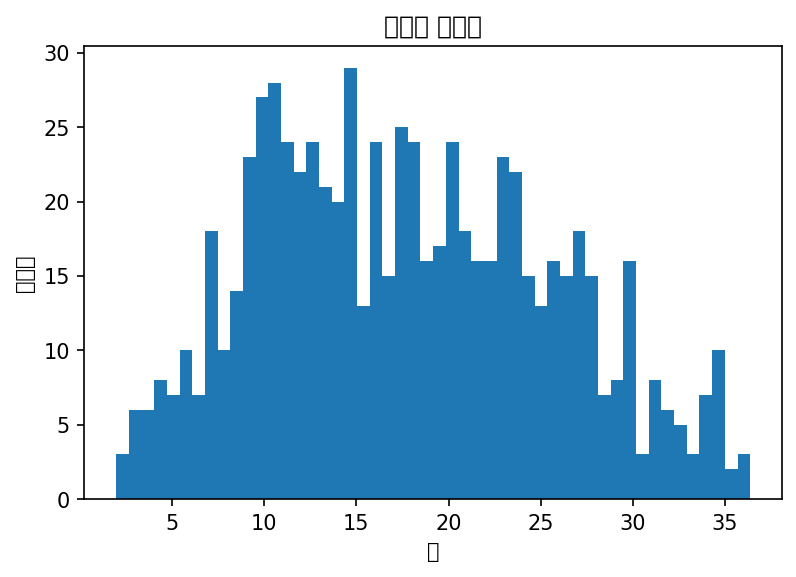

In [21]:
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
#dpi = 해상도
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.xlabel('일')
plt.ylabel('발전량')
plt.hist(train['TARGET'], bins=50)
plt.show()

In [22]:
#(730, 7)----> 700개 row과 7개의 칼럼
train.shape

(730, 7)



```
plt.subplot(nrows,ncols,index)
```
nrow = 열
ncol =  칼럼
index = 인덱스 위치


In [23]:
train.columns

Index(['ID', 'DHI', 'DNI', 'WS', 'RH', 'T', 'TARGET'], dtype='object')

In [24]:
for idx, feature in enumerate(train.columns):
  print(feature)
  print(idx)

ID
0
DHI
1
DNI
2
WS
3
RH
4
T
5
TARGET
6


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

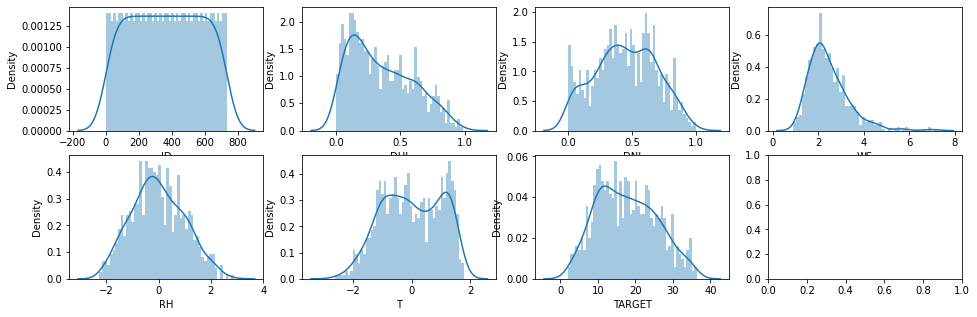

In [25]:
# 시각화를 위한 라이브러리
#enurmate를 사용한 변수가 2개인 반복문으로 몇번째 그래프인지 할당하고 이걸로 그래프를 배치함 
#displot은 distribution 을 표현
#즉 값의 분포를 확인하는 코드
#이거 하나 얻어갈듯?
import seaborn as sns

fig, ax = plt.subplots(2, 4, figsize=(16, 5))
for idx, feature in enumerate(train.columns):
    if idx<4:
      sns.distplot(train[feature], ax=ax[0,idx], bins=50)
    else:
      sns.distplot(train[feature], ax=ax[1,idx-4], bins=50)

#2 EDA

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

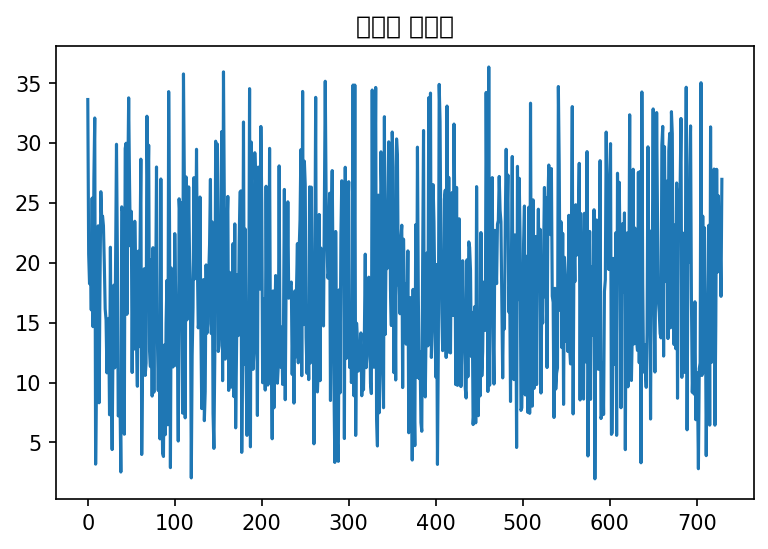

In [26]:
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.plot(train['TARGET'])
plt.show()

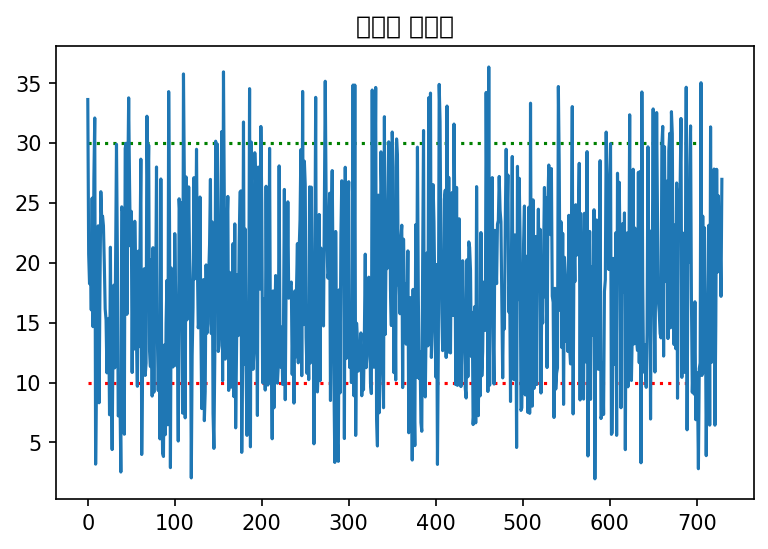

In [27]:
import matplotlib.pyplot as plt

# 이번 대회에서 예측하고자 하는 값인 태양광 발전량 TARGET을 확인해봅시다
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.plot(train['TARGET'])
plt.hlines(y=10, xmin=0, xmax=700, color='red', linestyle='dotted') # 발전량이 낮은 날의 수평선 그리기 (10 기준)
plt.hlines(y=30, xmin=0, xmax=700, color='green', linestyle='dotted') # 발전량이 높은 날의 수평선 그리기 (30 기준)
plt.show()

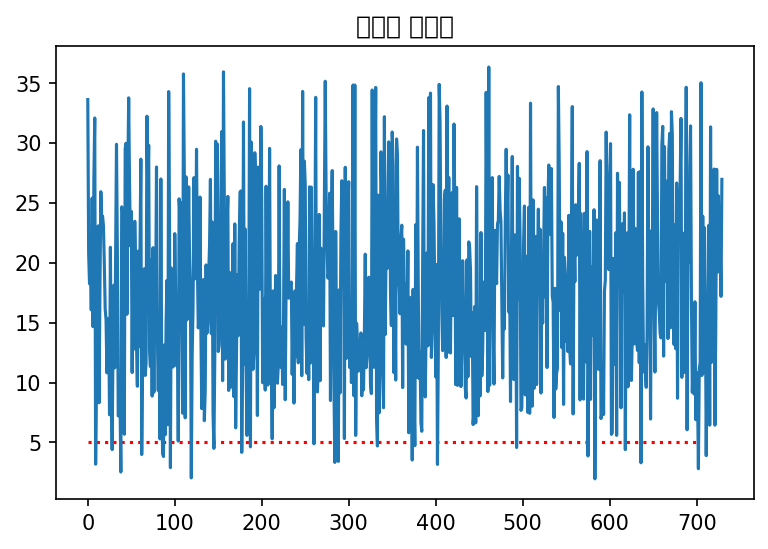

In [28]:
plt.figure(dpi=150)
plt.title("태양광 발전량")
plt.plot(train['TARGET'])
plt.hlines(y=5, xmin=0, xmax=700, color='red', linestyle='dotted') # 발전량이 낮은 날의 수평선 그리기 (5 기준)
plt.show()

In [29]:
train.mean()

ID        365.500000
DHI         0.353680
DNI         0.449832
WS          2.456610
RH         -0.015374
T           0.005201
TARGET     17.766240
dtype: float64

In [30]:
# train_df[train['TARGET'] < 5].head()
#query함수는 행을 추출할때 쓰는 것

train.query(" TARGET <= 5 ").head()

,ID,DHI,DNI,WS,RH,T,TARGET
9,10,0.126084,0.002794,2.487500,1.614283,-1.038493,3.186882
28,29,0.206466,0.021420,2.393750,2.867445,-0.431936,4.406631
38,39,0.076855,0.002956,2.172917,1.471696,-1.724676,2.528043
62,63,0.182660,0.011823,1.841667,0.995451,-1.338259,3.994407
86,87,0.147539,0.046848,3.512500,1.383272,-1.506877,4.090232


In [31]:
# train_df[train['TARGET'] >= 35].head()

train.query(" TARGET >= 35 ").head()

,ID,DHI,DNI,WS,RH,T,TARGET
110,111,0.270830,0.947241,3.145833,-2.013396,0.708579,35.794643
156,157,0.179280,0.998259,2.641667,-1.693291,1.284692,35.967975
273,274,0.243057,0.933960,2.202083,-0.731683,1.441601,35.183764
461,462,0.192799,1.000000,2.308333,-2.097931,1.373685,36.376067
705,706,0.224541,0.933231,2.197917,-0.345668,0.905301,35.060988


세울 수 있는 가설

-발전량에는 일사량 관련 칼럼(DHI, DNI)이 많은 영향을 미칠 것이다.

-상대습도가 높을수록 태양광 발전량의 크기 작을 것이다.

-기온이 높으면 태양광 발전량의 크기가 높을 것이다.

-풍속은 발전량에 직접적인 영향을 미치기보다는 상대습도와 연관이 높을 것이다.

이런식으로 비교하는 차트를 만들 수 있다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

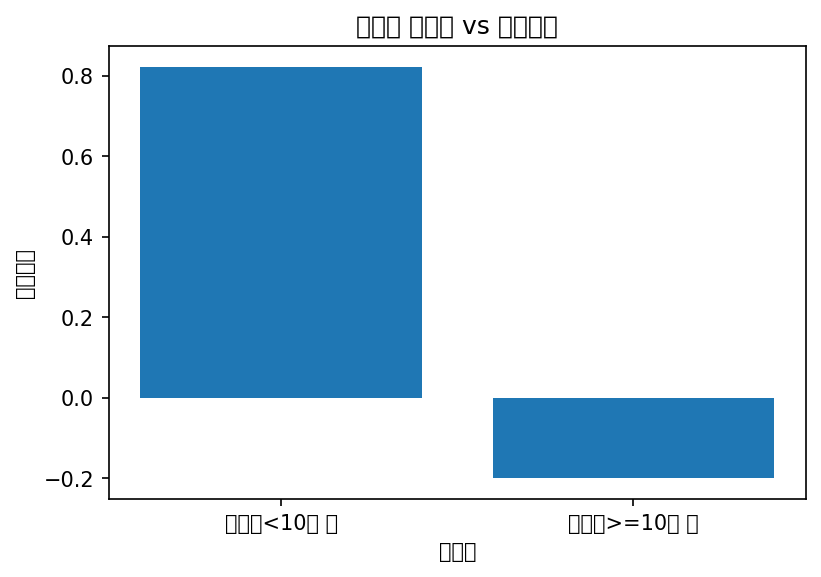

In [32]:
# 태양광 발전량이 10미만인 날과 10이상인 날의 상대습도 평균 비교
x = ['발전량<10인 날', '발전량>=10인 날']
y = [train[train['TARGET'] < 10]['RH'].mean(), train[train['TARGET'] >= 10]['RH'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 상대습도")
plt.xlabel('발전량')
plt.ylabel('상대습도')
plt.bar(x, y)
plt.show()

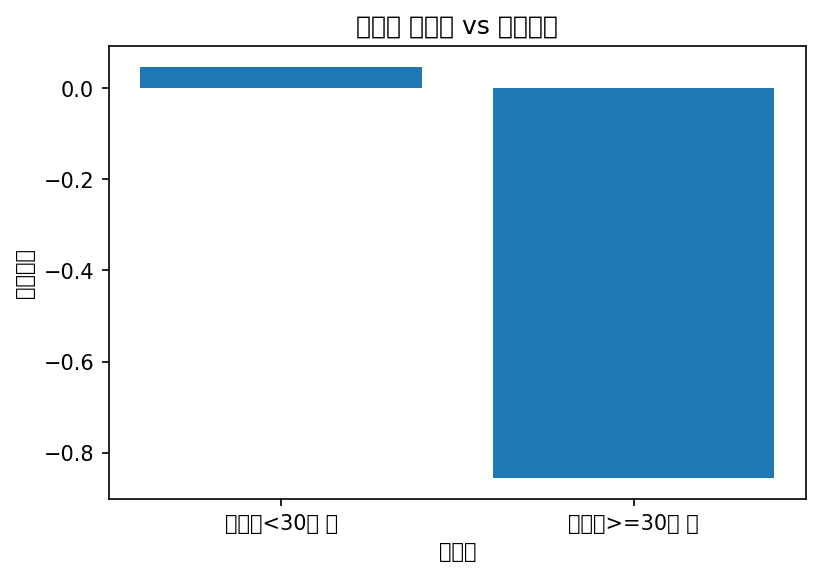

In [33]:
# 태양광 발전량이 30미만인 날과 30이상인 날의 상대습도 평균 비교
x = ['발전량<30인 날', '발전량>=30인 날']
y = [train[train['TARGET'] < 30]['RH'].mean(), train[train['TARGET'] >= 30]['RH'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 상대습도")
plt.xlabel('발전량')
plt.ylabel('상대습도')
plt.bar(x, y)
plt.show()

In [34]:
train

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963
...,...,...,...,...,...,...,...
725,726,0.501543,0.642224,2.918750,-1.219349,-0.094699,25.604709
726,727,0.082733,0.774102,3.110417,-0.612778,-0.563083,20.438856
727,728,0.587950,0.385512,2.704167,1.294474,0.839727,21.876819
728,729,0.816605,0.195044,1.656250,1.413581,0.811624,17.209349


산점도 그래프에서 여러 변수를 비교하는 방법도 배웠다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49845 missing from current font.
  font.set_

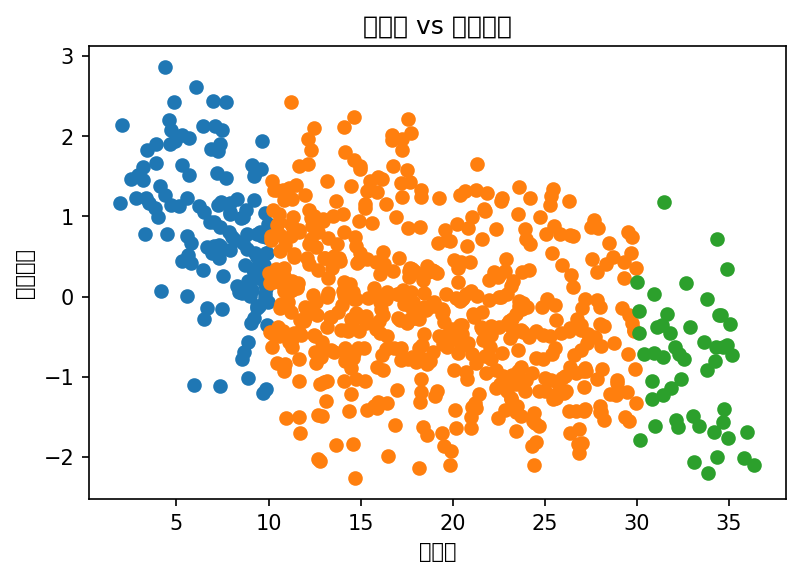

In [35]:
# 태양광 발전량이 10미만인 날
x_0 = train.loc[train['TARGET']<10, 'TARGET']
y_0 = train.loc[train['TARGET']<10, 'RH']

# 태양광 발전량이 10이상 30미만인 날
x_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'TARGET']
y_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'RH']

# 태양광 발전량이 30이상인 날
x_2 = train.loc[train['TARGET']>=30, 'TARGET']
y_2 = train.loc[train['TARGET']>=30, 'RH']


# scatter 산점도 그래프 그리기
plt.figure(dpi=150) 

plt.title('발전량 vs 상대습도')
plt.xlabel('발전량')
plt.ylabel('상대습도')

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

plt.show()

가설 2.
기온이 높으면 태양광 발전량의 크기가 높을 것이다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_

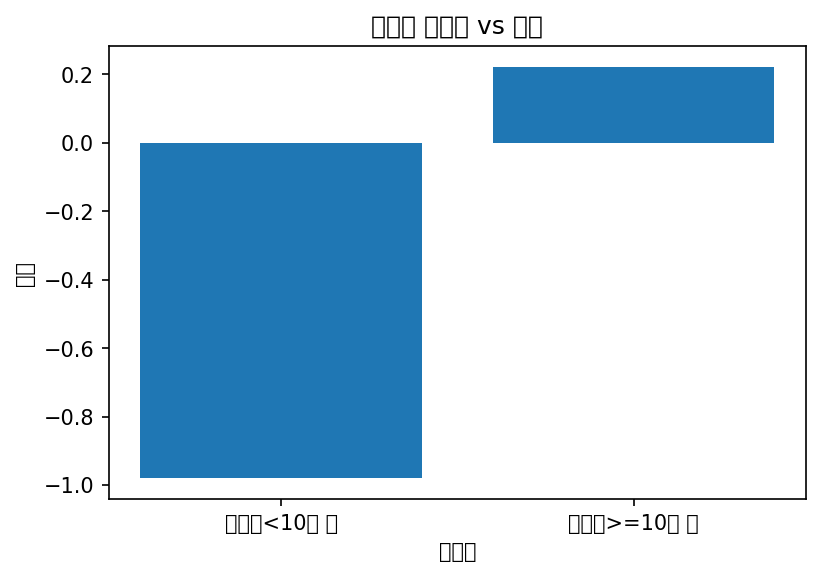

In [36]:
# 태양광 발전량이 낮은 날(10기준)
# 태양광 발전량이 10미만인 날과 10이상인 날의 기온 평균 비교
x = ['발전량<10인 날', '발전량>=10인 날']
y = [train[train['TARGET'] < 10]['T'].mean(), train[train['TARGET'] >= 10]['T'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 기온")
plt.xlabel('발전량')
plt.ylabel('기온')
plt.bar(x, y)
plt.show()

발전량이 10 미만인 날이 10 이상인 날 보다 기온 평균이 낮다.

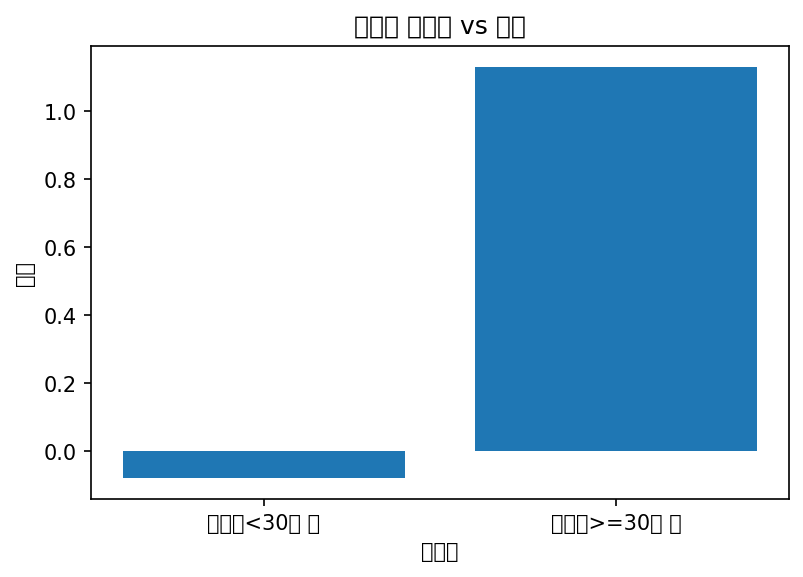

In [37]:
# 태양광 발전량이 높은 날 (30기준)
# 태양광 발전량이 30미만인 날과 30이상인 날의 상대습도 평균 비교
x = ['발전량<30인 날', '발전량>=30인 날']
y = [train[train['TARGET'] < 30]['T'].mean(), train[train['TARGET'] >= 30]['T'].mean()]

plt.figure(dpi=150)
plt.title("태양광 발전량 vs 기온")
plt.xlabel('발전량')
plt.ylabel('기온')
plt.bar(x, y)
plt.show()

발전량이 30 미만인 날보다 30 이상인 날일때 기온의 평균이 차이나게 높음을 볼 수 있다.

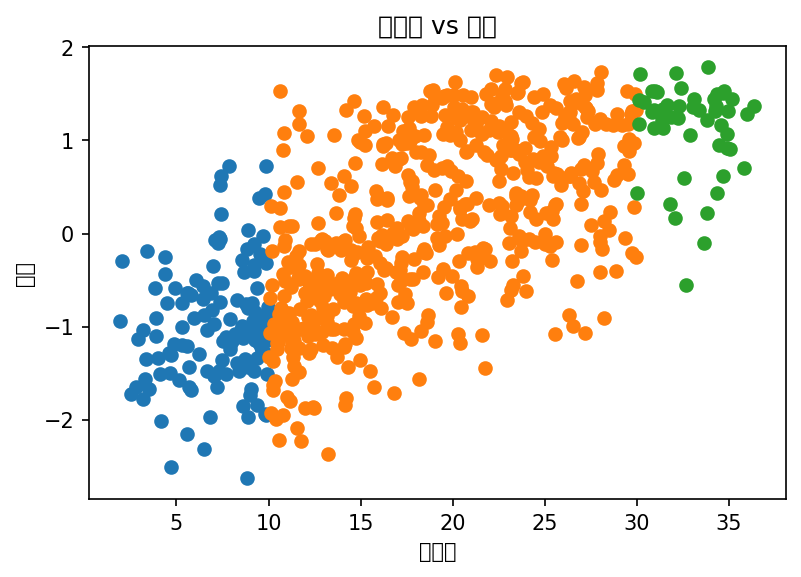

In [38]:
# 태양광 발전량이 10미만인 날
x_0 = train.loc[train['TARGET']<10, 'TARGET']
y_0 = train.loc[train['TARGET']<10, 'T']

# 태양광 발전량이 10이상 30미만인 날
x_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'TARGET']
y_1 = train.loc[(train['TARGET']>=10)&(train['TARGET']<30), 'T']

# 태양광 발전량이 30이상인 날
x_2 = train.loc[train['TARGET']>=30, 'TARGET']
y_2 = train.loc[train['TARGET']>=30, 'T']


# scatter 산점도 그래프 그리기
plt.figure(dpi=150) 

plt.title('발전량 vs 기온')
plt.xlabel('발전량')
plt.ylabel('기온')

plt.scatter(x_0, y_0)
plt.scatter(x_1, y_1)
plt.scatter(x_2, y_2)

plt.show()

전체적인 그래프가 우상향이므로 발전량과 상대습도는 반비례 관계에 있음을 알 수 있다.

이로써 기온이 높으면 태양광 발전량이 높을 것이라는 가설이 입증되었다.

가설 3.
풍속은 발전량에 직접적인 영향을 미치기보다는 상대습도와 연관이 높을 것이다.

In [46]:
train

,ID,DHI,DNI,WS,RH,T,TARGET
0,1,0.315650,0.885087,3.129167,-0.563454,-0.106409,33.659014
1,2,0.075239,0.756084,3.068750,-1.030301,0.317479,20.747731
2,3,0.148714,0.628092,1.547917,-1.190128,0.411156,18.263065
3,4,0.821308,0.283800,3.020833,-0.218049,1.308111,21.072718
4,5,0.174578,0.592866,2.056250,0.286934,-0.312498,16.076963
...,...,...,...,...,...,...,...
725,726,0.501543,0.642224,2.918750,-1.219349,-0.094699,25.604709
726,727,0.082733,0.774102,3.110417,-0.612778,-0.563083,20.438856
727,728,0.587950,0.385512,2.704167,1.294474,0.839727,21.876819
728,729,0.816605,0.195044,1.656250,1.413581,0.811624,17.209349


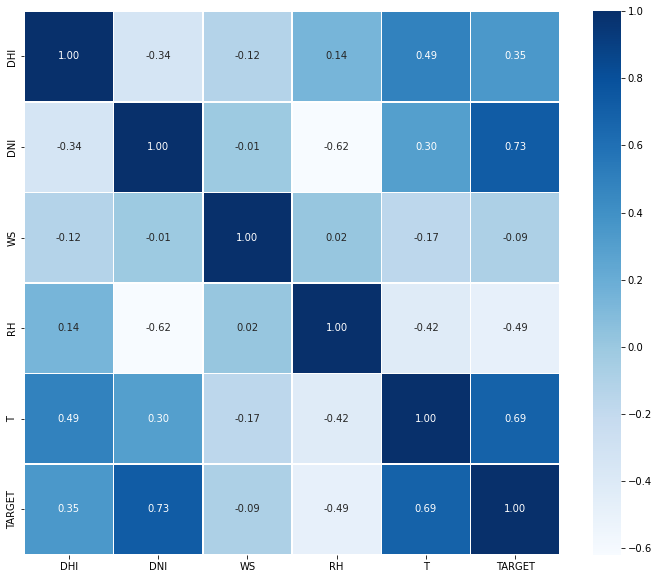

In [52]:
plt.figure(figsize=(12,10))
sns.heatmap(data = train.drop(['ID'], axis=1).corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

실제 위의 상관관계 표에서 보다싶이 WS는 어느 칼럼과도 의미있는 관계를 갖고 있다고 볼 수 없다.

따라서 데이터를 통해 결과값을 예측할 때 WS 칼럼은 삭제하고 예측을 실행할 것이다.

가설 4.
발전량에는 일사량 관련 칼럼(DHI, DNI)이 많은 영향을 미칠 것이다.